# Importing the necessary libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Get the data and divide the dataset


In [2]:
(x_train,y_train), (x_test,y_test)= keras.datasets.fashion_mnist.load_data()

#assertion on the shape of the datasets
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

4431872/4422102 [==============================] - 0s 0us/step


# Display a sample from the x_train

Label:>  5


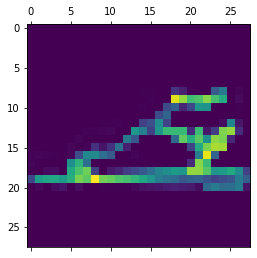

In [3]:
SAMPLE= x_train[300] #picking a sample from the train set
plt.matshow(SAMPLE)
print("Label:> ",y_train[300])

# Flattening the dataset(ANN)

In [4]:
x_train_flatten= x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test_flatten= x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

print(x_train_flatten.shape)
print(x_test_flatten.shape)

#converting to float32 precision
x_train_flatten = x_train_flatten.astype('float32')
x_test_flatten = x_test_flatten.astype('float32')

#Normalize the data
x_train_flatten /= 255
x_test_flatten /= 255

# #one hot encoding of the labels
# y_train_one_hot = keras.utils.to_categorical(y_train,10)
# y_test_one_hot = keras.utils.to_categorical(y_test,10)


(60000, 784)
(10000, 784)


# Defining Single Layer Perceptron model

In [10]:
LAYERS_SIZE= x_train_flatten.shape[1] #784
CLASSES= 10 #no of classes are from 0-9
model= keras.Sequential([
                         keras.layers.Dense(input_shape=(LAYERS_SIZE,),units=10,activation="softmax"), #392
                         
])

In [11]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


# Training the model

In [8]:
training= model.fit(x_train_flatten, y_train,epochs=50, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test_flatten, y_test)
print('Test accuracy:> ', test_acc)

Epoch 1/50
1500/1500 [==============================] - 6s 2ms/step - loss: 0.6261 - accuracy: 0.7886 - val_loss: 0.4952 - val_accuracy: 0.8335
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4725 - accuracy: 0.8394 - val_loss: 0.4621 - val_accuracy: 0.8419
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4458 - accuracy: 0.8477 - val_loss: 0.4344 - val_accuracy: 0.8519
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4274 - accuracy: 0.8529 - val_loss: 0.4378 - val_accuracy: 0.8487
Epoch 5/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4183 - accuracy: 0.8555 - val_loss: 0.4297 - val_accuracy: 0.8490
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4111 - accuracy: 0.8571 - val_loss: 0.4225 - val_accuracy: 0.8545
Epoch 7/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4058 - accuracy: 0.8590 - val_loss: 0.4188 - val_accuracy:

# Visualize the accuracy metrics

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


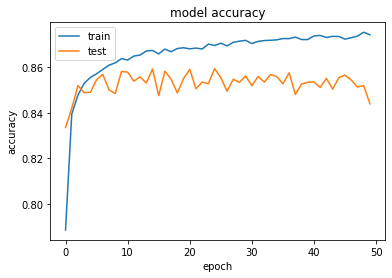

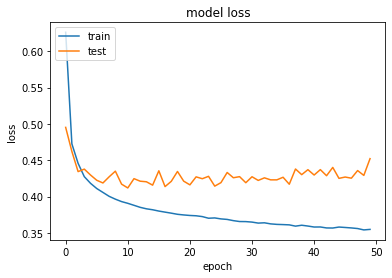

In [9]:
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Adding hidden layers and dropout to the model

In [13]:
LAYERS_SIZE= x_train_flatten.shape[1] #784
CLASSES= 10 #no of classes are from 0-9
model= keras.Sequential([
                         keras.layers.Dense(input_shape=(LAYERS_SIZE,),units=LAYERS_SIZE/2,activation="relu"), #392
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(units=10, activation="softmax"), #196
])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

training= model.fit(x_train_flatten, y_train,epochs=50, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test_flatten, y_test)
print('Test accuracy:> ', test_acc)

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5173 - accuracy: 0.8154 - val_loss: 0.3957 - val_accuracy: 0.8542
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3933 - accuracy: 0.8567 - val_loss: 0.3709 - val_accuracy: 0.8670
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3578 - accuracy: 0.8680 - val_loss: 0.3536 - val_accuracy: 0.8777
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3355 - accuracy: 0.8766 - val_loss: 0.3500 - val_accuracy: 0.8702
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3198 - accuracy: 0.8809 - val_loss: 0.3222 - val_accuracy: 0.8835
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3074 - accuracy: 0.8850 - val_loss: 0.3265 - val_accuracy: 0.8832
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2975 - accuracy: 0.8880 - val_loss: 0.3252 - val_accuracy:

# Adding more layers 

In [14]:
LAYERS_SIZE= x_train_flatten.shape[1] #784
CLASSES= 10 #no of classes are from 0-9
model= keras.Sequential([
                         keras.layers.Dense(input_shape=(LAYERS_SIZE,),units=LAYERS_SIZE/2,activation="relu"), #392
                         keras.layers.Dense(units=LAYERS_SIZE/4, activation="relu"),
                         keras.layers.Dense(units=LAYERS_SIZE/8, activation="relu"),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(units=10, activation="softmax"), #196
])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

training= model.fit(x_train_flatten, y_train,epochs=50, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test_flatten, y_test)
print('Test accuracy:> ', test_acc)

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5251 - accuracy: 0.8123 - val_loss: 0.4164 - val_accuracy: 0.8528
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3882 - accuracy: 0.8595 - val_loss: 0.4034 - val_accuracy: 0.8553
Epoch 3/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3477 - accuracy: 0.8738 - val_loss: 0.3510 - val_accuracy: 0.8709
Epoch 4/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3226 - accuracy: 0.8822 - val_loss: 0.3488 - val_accuracy: 0.8717
Epoch 5/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3030 - accuracy: 0.8881 - val_loss: 0.3452 - val_accuracy: 0.8757
Epoch 6/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2886 - accuracy: 0.8936 - val_loss: 0.3234 - val_accuracy: 0.8885
Epoch 7/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2752 - accuracy: 0.8972 - val_loss: 0.3505 - val_accuracy:

# Changing optimizer of the model

In [15]:
LAYERS_SIZE= x_train_flatten.shape[1] #784
CLASSES= 10 #no of classes are from 0-9
model= keras.Sequential([
                         keras.layers.Dense(input_shape=(LAYERS_SIZE,),units=LAYERS_SIZE/2,activation="relu"), #392
                         keras.layers.Dense(units=LAYERS_SIZE/4, activation="relu"),
                         keras.layers.Dense(units=LAYERS_SIZE/8, activation="relu"),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(units=10, activation="softmax"), #196
])

opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

training= model.fit(x_train_flatten, y_train,epochs=50, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test_flatten, y_test)
print('Test accuracy:> ', test_acc)

Epoch 1/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5562 - accuracy: 0.8008 - val_loss: 0.4426 - val_accuracy: 0.8422
Epoch 2/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4342 - accuracy: 0.8503 - val_loss: 0.3990 - val_accuracy: 0.8577
Epoch 3/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4190 - accuracy: 0.8589 - val_loss: 0.4281 - val_accuracy: 0.8603
Epoch 4/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4146 - accuracy: 0.8636 - val_loss: 0.4096 - val_accuracy: 0.8705
Epoch 5/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4203 - accuracy: 0.8646 - val_loss: 0.4860 - val_accuracy: 0.8542
Epoch 6/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4264 - accuracy: 0.8634 - val_loss: 0.4651 - val_accuracy: 0.8674
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4270 - accuracy: 0.8652 - val_loss: 0.4679 - val_accuracy:

# Adding more layers to the model

In [16]:
LAYERS_SIZE= x_train_flatten.shape[1] #784
CLASSES= 10 #no of classes are from 0-9
model= keras.Sequential([
                         keras.layers.Dense(input_shape=(LAYERS_SIZE,),units=LAYERS_SIZE/2,activation="relu"), #392
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(units=LAYERS_SIZE/4, activation="relu"),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(units=LAYERS_SIZE/8, activation="relu"),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(units=LAYERS_SIZE/16, activation="relu"),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(units=10, activation="softmax"), #196
])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

training= model.fit(x_train_flatten, y_train,epochs=50, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test_flatten, y_test)
print('Test accuracy:> ', test_acc)

Epoch 1/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6602 - accuracy: 0.7611 - val_loss: 0.4459 - val_accuracy: 0.8381
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4689 - accuracy: 0.8349 - val_loss: 0.4008 - val_accuracy: 0.8531
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4251 - accuracy: 0.8492 - val_loss: 0.3943 - val_accuracy: 0.8541
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3980 - accuracy: 0.8586 - val_loss: 0.3615 - val_accuracy: 0.8708
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3813 - accuracy: 0.8650 - val_loss: 0.3531 - val_accuracy: 0.8743
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3650 - accuracy: 0.8697 - val_loss: 0.3491 - val_accuracy: 0.8724
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3544 - accuracy: 0.8728 - val_loss: 0.3437 - val_accuracy:

# Changing batch size and the epochs 

In [17]:
LAYERS_SIZE= x_train_flatten.shape[1] #784
CLASSES= 10 #no of classes are from 0-9
model= keras.Sequential([
                         keras.layers.Dense(input_shape=(LAYERS_SIZE,),units=LAYERS_SIZE/2,activation="relu"), #392
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(units=LAYERS_SIZE/4, activation="relu"),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(units=LAYERS_SIZE/8, activation="relu"),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(units=LAYERS_SIZE/16, activation="relu"),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(units=10, activation="softmax"), #196
])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

training= model.fit(x_train_flatten, y_train,epochs=70, validation_split=0.2, batch_size=64)
test_loss, test_acc = model.evaluate(x_test_flatten, y_test)
print('Test accuracy:> ', test_acc)

Epoch 1/70
750/750 [==============================] - 4s 5ms/step - loss: 0.6785 - accuracy: 0.7561 - val_loss: 0.4232 - val_accuracy: 0.8429
Epoch 2/70
750/750 [==============================] - 3s 4ms/step - loss: 0.4600 - accuracy: 0.8387 - val_loss: 0.3884 - val_accuracy: 0.8622
Epoch 3/70
750/750 [==============================] - 3s 4ms/step - loss: 0.4157 - accuracy: 0.8520 - val_loss: 0.3638 - val_accuracy: 0.8679
Epoch 4/70
750/750 [==============================] - 3s 5ms/step - loss: 0.3878 - accuracy: 0.8625 - val_loss: 0.3562 - val_accuracy: 0.8733
Epoch 5/70
750/750 [==============================] - 3s 4ms/step - loss: 0.3658 - accuracy: 0.8690 - val_loss: 0.3518 - val_accuracy: 0.8755
Epoch 6/70
750/750 [==============================] - 3s 5ms/step - loss: 0.3562 - accuracy: 0.8734 - val_loss: 0.3482 - val_accuracy: 0.8772
Epoch 7/70
750/750 [==============================] - 3s 4ms/step - loss: 0.3405 - accuracy: 0.8768 - val_loss: 0.3390 - val_accuracy: 0.8797
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


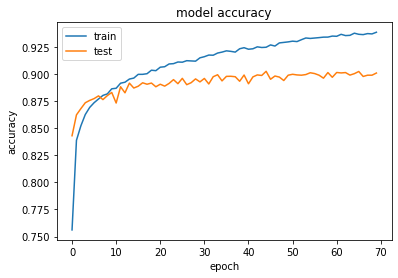

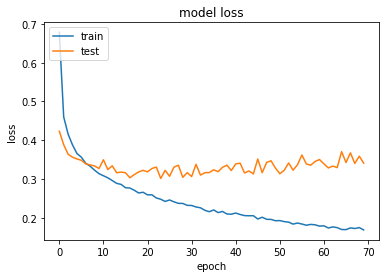

In [20]:
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
model.summary() #best model summary

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 392)               307720    
_________________________________________________________________
dropout_7 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 196)               77028     
_________________________________________________________________
dropout_8 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 98)                19306     
_________________________________________________________________
dropout_9 (Dropout)          (None, 98)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 49)               

# Best model configuration

In [19]:
model.get_config() #best model configurations

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_16_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_16',
    'trainable': True,
    'units': 392,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_7',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': 

# Summary

83.25, 89.27, 88.31, 82.12, 89.30, 89.56

In this project, I ran experiments as required in the assignment and follwing are the test accuracies for each experiments:
**83.25%--> 89.27%--> 88.31%--> 82.12%--> 89.30%--> 89.56%**

Few Observations:

* Generally, Adam optimizer works best as compared Rmsprop.
* By adding more hidden layers, overfitting reduced a bit but overall improvement in the final test accuracy is minimal.

**The best model total parameters are: 409,405 and the best accuracy is 89.56%**